In [65]:
import pandas as pd
import matplotlib.pylab as plt

In [66]:
df2 = pd.read_csv('journals_super.csv')

Populating the interactive namespace from numpy and matplotlib


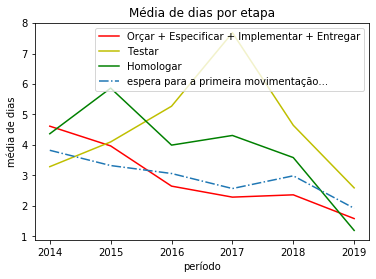

In [67]:
no_periodo = df2.ano_mes.between('2014-01', '2019-12')
intervalo = ['ano']

em_teste = df2.para=='Testar implementação'
em_homologacao = df2.para=='Homologar com Demandante'
na_fabrica = ((df2.para=='Realizar implementação') 
              | (df2.para=='Especificar testes') 
              | (df2.para=='Realizar orçamento') 
              | (df2.para=='Entregar artefatos')
             )

fab   = df2[no_periodo & na_fabrica].groupby(intervalo).dias
teste = df2[no_periodo & em_teste].groupby(intervalo).dias
homol = df2[no_periodo & em_homologacao].groupby(intervalo).dias

x = df2.loc[no_periodo].groupby('demanda').nth(1).loc[no_periodo, :].groupby(intervalo).dias

#%pylab qt
%pylab inline

plt.plot(fab.mean(), 'r', label='Orçar + Especificar + Implementar + Entregar')
plt.plot(teste.mean(), 'y', label='Testar')
plt.plot(homol.mean(), 'g', label='Homologar')
plt.plot(x.mean(), '-.', label='espera para a primeira movimentação...')

#plt.plot(fab.std(), 'r-.', label='desvio padrão fabrica')
#plt.plot(teste.std(), 'y-.', label='desvio padrão teste')
#plt.plot(homol.std(), 'g-.', label='desvio padrão homologacao')

plt.title('Média de dias por etapa')
plt.xlabel('período')
plt.ylabel('média de dias')
#plt.xticks(rotation=90)
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


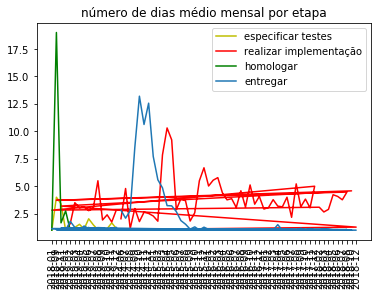

In [77]:
no_periodo = df2.ano_mes.between('2014-06', '2019-16')
intervalo = ['ano_mes']

#em_teste = df2.para=='Testar implementação'
#em_homologacao = df2.para=='Homologar com Demandante'

especificar = df2.para=='Especificar testes'
realizar = df2.para=='Realizar implementação'
orcar = df2.para=='Realizar orçamento'
entregar = df2.para=='Entregar artefatos'

espec = df2[no_periodo & especificar].groupby(intervalo).dias
reali = df2[no_periodo & realizar].groupby(intervalo).dias
orcar = df2[no_periodo & orcar].groupby(intervalo).dias
entre = df2[no_periodo & entregar].groupby(intervalo).dias

#%pylab qt
%pylab inline

plt.plot(espec.mean(), 'y', label='especificar testes')
plt.plot(reali.mean(), 'r', label='realizar implementação')
plt.plot(orcar.mean(), 'g', label='homologar')
plt.plot(entre.mean(), label='entregar')

#plt.plot(fab.std(), 'r-.', label='fabrica')
#plt.plot(teste.std(), 'y-.', label='teste')
#plt.plot(homol.std(), 'g-.', label='homologacao')

plt.title('número de dias médio mensal por etapa')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [69]:
s = df2.dias.unique().std()
s

108.85205850763495

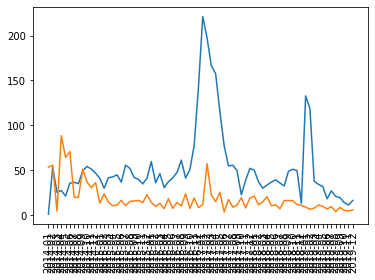

In [70]:
no_periodo = df2.ano_mes.between('2014-01', '2019-12')
intervalo = ['ano_mes']

com_onus = (df2.para.str.contains('com ônus'))
sem_onus = (df2.para.str.contains('sem ônus'))

mco = df2[no_periodo & com_onus].groupby(intervalo).acum_dias.mean()
mso = df2[no_periodo & sem_onus].groupby(intervalo).acum_dias.mean()

plt.plot(mco)
plt.plot(mso)
plt.xticks(rotation=90)
plt.show()

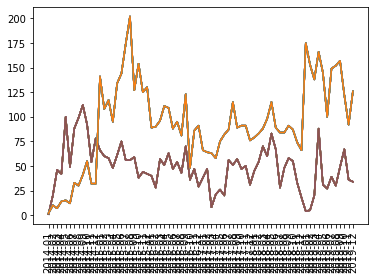

In [71]:
no_periodo = df2.ano_mes.between('2014-01', '2019-12')
intervalo = ['ano_mes']

com_onus = (df2.para.str.contains('com ônus'))
sem_onus = (df2.para.str.contains('sem ônus'))

tpco = df2[no_periodo & com_onus].groupby(intervalo).count()
tpso = df2[no_periodo & sem_onus].groupby(intervalo).count()

plt.plot(tpco)
plt.plot(tpso)
plt.xticks(rotation=90)
plt.show()

Populating the interactive namespace from numpy and matplotlib


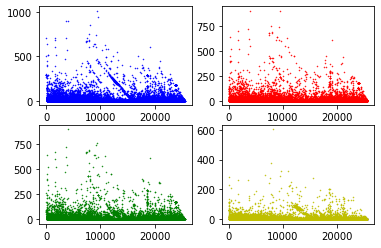

In [72]:
x = df2.loc[(df2.tipo!='mae')].groupby(['demanda']).acum_dias

#%pylab qt
%pylab inline

plt.subplot(2, 2, 1)
plt.plot(x.max(), 'b.', markersize=1)

plt.subplot(2, 2, 2)
plt.plot(x.median(), 'r.', markersize=1)

plt.subplot(2, 2, 3)
plt.plot(x.mean(), 'g.', markersize=1)

plt.subplot(2, 2, 4)
plt.plot(x.std(), 'y.', markersize=1)
plt.show()

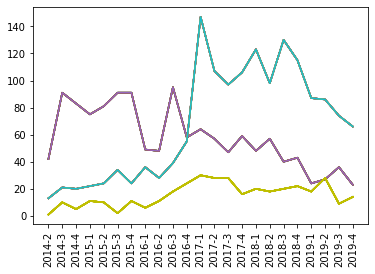

In [73]:
no_periodo = df2.ano_mes.between('2014-01', '2019-12')

d = df2.loc[no_periodo].groupby('demanda').last().loc[no_periodo & df2.para.str.contains('com ônus'), :].groupby('trimestre').count()
d2 = df2.loc[no_periodo].groupby('demanda').last().loc[no_periodo & df2.para.str.contains('sem ônus'), :].groupby('trimestre').count()
d3 = df2.loc[no_periodo].groupby('demanda').last().loc[no_periodo & df2.para.str.contains('cancelada'), :].groupby('trimestre').count()
#x = df2.loc[no_periodo].groupby('demanda').nth(1).loc[no_periodo, :].groupby('trimestre').dias.max()  # espera pelo 1o. antendimento!

#d.head(50)
plt.plot(d)
plt.plot(d2)
plt.plot(d3, 'y')
#plt.plot(x , 'o')

plt.xticks(rotation=90)
plt.show()

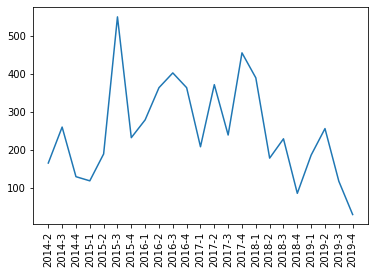

In [74]:
x = df2.loc[no_periodo].groupby('demanda').nth(1).loc[no_periodo, :].groupby('trimestre').dias.max()  # espera pelo 1o. antendimento!
plt.plot(x)
plt.xticks(rotation=90)
plt.show()

In [76]:
tpf = d.tail().loc[no_periodo & df2.para.str.contains('com ônus')].groupby('trimestre').count()
tpi = d.tail().loc[no_periodo & df2.para.str.contains('sem ônus')].groupby('trimestre').count()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
#%pylab qt
%pylab inline

print(tp.size)
plt.plot(tpf)
plt.plot(tpi)
plt.xticks(rotation=90)
plt.show()

In [ ]:
d.last().tail(50)[df2.para.str.contains('sem ônus')]